<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-109.022349,42.774442,686.131946,-643.357504
1,0.0,1.0,68.663703,66.045349,-1641.553748,-1496.844696,305.348553,-1802.193250
2,0.0,2.0,21.071655,68.659935,-691.687274,-591.955684,749.148724,-1341.104408
3,0.0,3.0,43.844790,78.255402,698.959813,831.060005,791.816930,39.243075
4,0.0,4.0,37.606052,48.352160,-1620.493073,-1524.534860,138.835379,-1663.370239
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-3373.178389,-3231.904417,-285.412292,-2946.492125
29996,999.0,26.0,82.498172,54.958596,906.390599,1053.847367,207.467172,846.380195
29997,999.0,27.0,39.545015,80.575288,-2305.272456,-2175.152153,-334.538785,-1840.613368
29998,999.0,28.0,58.576661,46.412209,-420.873237,-305.884367,26.710938,-332.595305


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-109.022349,42.774442,686.131946,-643.357504
1,0.0,1.0,68.663703,66.045349,-1641.553748,-1496.844696,305.348553,-1802.193250
2,0.0,2.0,21.071655,68.659935,-691.687274,-591.955684,749.148724,-1341.104408
3,0.0,3.0,43.844790,78.255402,698.959813,831.060005,791.816930,39.243075
4,0.0,4.0,37.606052,48.352160,-1620.493073,-1524.534860,138.835379,-1663.370239
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-3373.178389,-3231.904417,-285.412292,-2946.492125
29996,999.0,26.0,82.498172,54.958596,906.390599,1053.847367,207.467172,846.380195
29997,999.0,27.0,39.545015,80.575288,-2305.272456,-2175.152153,-334.538785,-1840.613368
29998,999.0,28.0,58.576661,46.412209,-420.873237,-305.884367,26.710938,-332.595305


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-109.022349,42.774442,686.131946,-643.357504
1,0.0,1.0,68.663703,66.045349,-1641.553748,-1496.844696,305.348553,-1802.193250
2,0.0,2.0,21.071655,68.659935,-691.687274,-591.955684,749.148724,-1341.104408
3,0.0,3.0,43.844790,78.255402,698.959813,831.060005,791.816930,39.243075
4,0.0,4.0,37.606052,48.352160,-1620.493073,-1524.534860,138.835379,-1663.370239
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-3373.178389,-3231.904417,-285.412292,-2946.492125
29996,999.0,26.0,82.498172,54.958596,906.390599,1053.847367,207.467172,846.380195
29997,999.0,27.0,39.545015,80.575288,-2305.272456,-2175.152153,-334.538785,-1840.613368
29998,999.0,28.0,58.576661,46.412209,-420.873237,-305.884367,26.710938,-332.595305


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

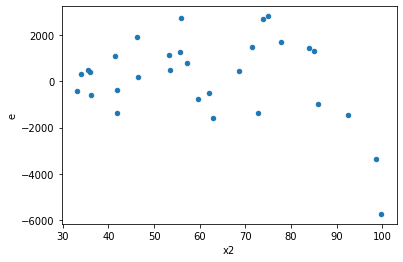

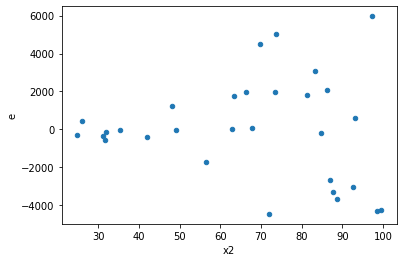

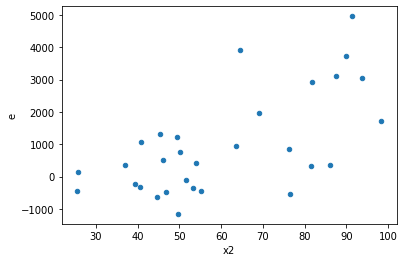

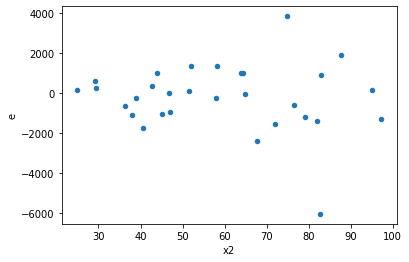

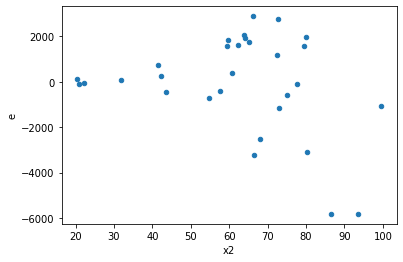

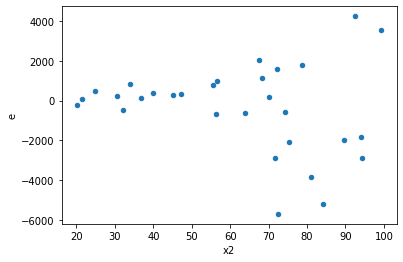

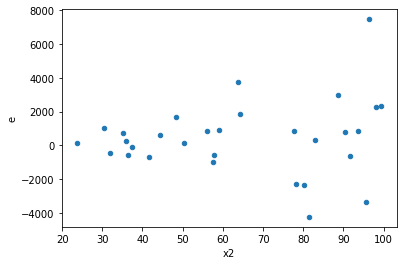

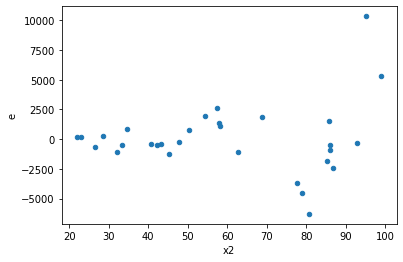

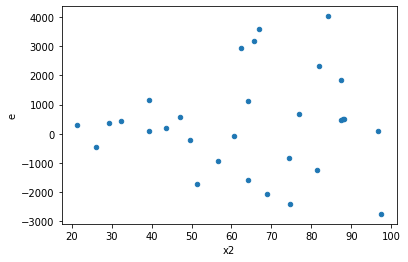

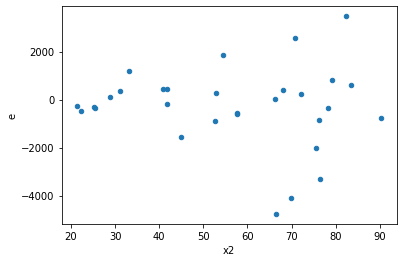

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,10.0,10.0,4118685.0047345627,61131968.47331424,411868.5004734563,6113196.847331424,14.842593789775389,0.00020353180705967588,0.9998982340964702,0.00010176590352983794,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,7538514.942160558,16464707.036813919,753851.4942160558,1646470.703681392,2.1840783182284293,0.2339275371180769,0.8830362314409615,0.11696376855903845,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,62675312.4730458,89966069.01337156,6267531.24730458,8996606.901337156,1.4354307216587463,0.5782305057292079,0.7108847471353961,0.28911525286460393,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,3520995.6805817448,75696763.28405555,352099.56805817445,7569676.328405554,21.49868109794125,3.759762057908844e-05,0.9999812011897105,1.879881028954422e-05,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,5139805.720684558,112803472.88807625,513980.5720684558,11280347.288807625,21.947030494579128,3.4167545725383164e-05,0.9999829162271373,1.7083772862691582e-05,Reject005=0 : Heteroscedasticity
12.0,10.0,10.0,5485082.877427277,30336506.185632326,548508.2877427277,3033650.6185632325,5.530728862908514,0.012333110469620268,0.9938334447651899,0.006166555234810134,Reject005=0 : Heteroscedasticity
14.0,10.0,10.0,34626855.74852913,40574361.05342437,3462685.5748529127,4057436.1053424375,1.1717599006992683,0.806983733245461,0.5965081333772695,0.4034918666227305,Reject005=1 : Homoscedasticity
16.0,10.0,10.0,15743062.41214944,67802986.99681878,1574306.241214944,6780298.699681878,4.306848643659888,0.030416367372110287,0.9847918163139449,0.015208183686055143,Reject005=0 : Heteroscedasticity
17.0,10.0,10.0,3186220.6456376393,157986650.1726792,318622.0645637639,15798665.017267918,49.58434074205877,7.120068037380634e-07,0.9999996439965981,3.560034018690317e-07,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,11989697.768896287,9389956.58977042,1198969.7768896287,938995.658977042,0.7831687479337365,0.7065745627395242,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,40012914.88426971,1153189.5025484785,4001291.488426971,115318.95025484785,0.02882043225003416,3.9556132836973486e-06,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,4118685.0047345627,61131968.47331424,411868.5004734563,6113196.847331424,14.842593789775389,0.00020353180705967588,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,78747102.7583392,11462363.42324053,7874710.27583392,1146236.342324053,0.1455591764234994,0.005347379282344106,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,7538514.942160558,16464707.036813919,753851.4942160558,1646470.703681392,2.1840783182284293,0.2339275371180769,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,62675312.4730458,89966069.01337156,6267531.24730458,8996606.901337156,1.4354307216587463,0.5782305057292079,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,3520995.6805817448,75696763.28405555,352099.56805817445,7569676.328405554,21.49868109794125,3.759762057908844e-05,Reject005=0 : Heteroscedasticity
7.0,10.0,10.0,69951801.11359419,43577881.900016464,6995180.111359419,4357788.190001646,0.6229701195148739,0.467493091210654,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,5139805.720684558,112803472.88807625,513980.5720684558,11280347.288807625,21.947030494579128,3.4167545725383164e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    646
Reject005=1 : Homoscedasticity      354
Name: Result_test, dtype: int64